# Class 07: Statistical Inference




In [1]:
import YData

YData.download_data("movies.csv")
YData.download_data("daily_bike_totals.csv")
YData.download_data('bta.csv')
YData.download_data("babies.csv")
YData.download_data("amazon.csv")

In [2]:
import statistics
import pandas as pd
import numpy as np
from urllib.request import urlopen
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# In Class Drills! 

### 0.1 For Loops

As we discussed last class, loops allow us to repeat a process many times. They are particularly useful in conjuction with lists to process and store multiple values. 

The code below loads our bike data from 2014 and can creates two lists which are:

- `weekday`: A list of Booleans specifying whether a day is a weekday
- `num_trips`: A list containing how many trips were taken on each day


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_csv("daily_bike_totals.csv", parse_dates = [0])
bikes_2014 = bikes.query("date > '2013-12-31'").query("date < '2015-01-01'")

weekday = bikes_2014["weekday"].to_list()
num_trips = bikes_2014["trips"].to_list()

print(weekday[0:5])
print(num_trips[0:5])

[True, True, True, False, False]
[6059, 8600, 1144, 2292, 2678]


### Exercise 1

Please use a for loop to create a list called `weekday_trips` which contains the number of trips that occurred only on weekdays. 


In [4]:
# Do not use the zip function. 

weekday_trips = []

for i in range(len(num_trips)):
    if weekday[i] == True:
        weekday_trips.append(num_trips[i])
    
    
len(weekday_trips)





261

In [5]:
# Now try using the zip function. 

weekday_trips2 = []

for i, j in zip(weekday, num_trips):
    if i == True: 
        weekday_trips2.append(j)

len(weekday_trips2)





261

### Exercise 2

Now add to your code so that you also create a list called `weekend_trips` that contain the number of trips that occured on all weekend. 

Once you have created these lists create side-by-side boxplots to compare the number of trips taken on weekdays and weekends. 


261 104


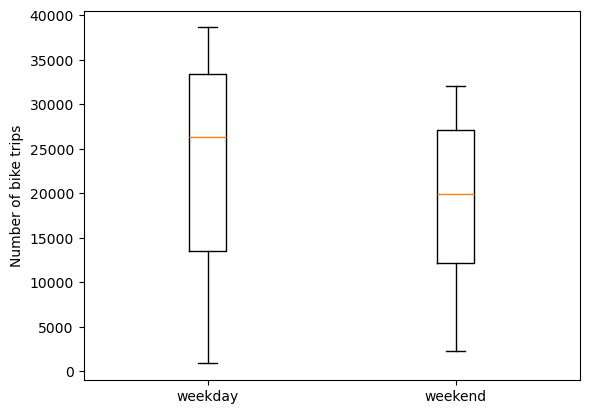

In [6]:


weekday_trips = []
weekend_trips = []

for i in range(len(num_trips)):
    if weekday[i] == True:
        weekday_trips.append(num_trips[i])
    else:
        weekend_trips.append(num_trips[i])
    
    
print(len(weekday_trips), len(weekend_trips))


plt.boxplot([weekday_trips, weekend_trips], tick_labels = ["weekday", "weekend"]);
plt.ylabel("Number of bike trips");




### 0.2 Writing Functions

For pracice writing functions, let's write a function that will mimic flipping coins. This function will be useful when we start talking about statistical inference. 

In particular, let's write a function called `flip_coins(n, prob)` which will simulate flipping a coin `n` times where:
- `n` is the number of times we have flipped the coin
- `prob` is the probability that each coin flip will return "head"

The function should return the number of "heads" that occurred from flipping the coin `n` times; i.e., it should return a number between 0, which means no heads occurred, and `n` which means a "head" occurred on every flip. 

When writing functions, it is often useful to write the bulk of the code outside of a function and then turn in into a function by wrapping your code in a `def` statement. Let's go through a few steps of writing this function now. 


#### Step 1: Generating random numbers between 0 and 1

We can use the numpy function `np.random.rand(n)` to generate `n` random numbers. Please create a name called `n` and set it equal to 500 to simulate 500 random coin flips. Then use the name `n`, along with the `np.random.rand(n)` to generate 500 random numbers between 0 and 1. Save these random numbers to the name `rand_nums`. 

Finally, to see what these numbers look like, visualize `rand_nums` using a histogram. 


[0.43598828 0.3574789  0.34324339 0.87894439 0.29444684 0.40346977
 0.86573099 0.8547437  0.2413716  0.93411063]


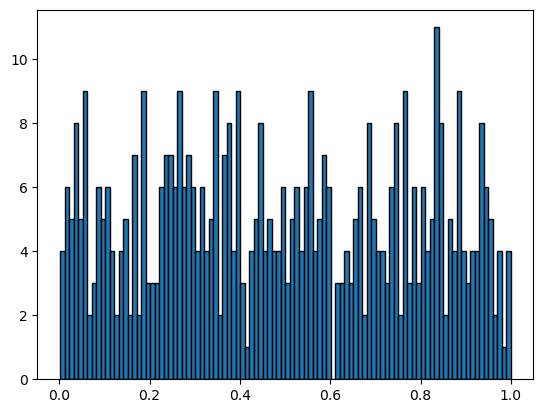

In [7]:
# Use np.random.rand() to generate n = 500 random numbers between 0 and 1, and visualize them as a histogram. 

n = 500 
rand_nums = np.random.rand(n)

print(rand_nums[0:10])
plt.hist(rand_nums, bins = 100, edgecolor = "black");





#### Step 2: Count the number of "heads"

Next create a name called `prob` which has the probability that a coin flip is a "head". Let's set `prob` to be equal to .5 to simulate flipping a fair coin. Then see how many of the `rand_nums` are less than the `prob` value to see how many of your coin flips were "head"; i.e., use `np.sum()` to count how many of your coin flips were heads. 



In [8]:
# Set prob to .5 and count how many values are greater than prob
prob = 0.5
np.sum(rand_nums <= prob)



np.int64(259)

#### Step 3: Creating the function flip_coins(n, prob)

Now write the function `flip_coins(n, prob)` by taking the code you wrote in the previous two steps and turning it into a function. 

Then try out the function a few times and see how the number of "heads" you get varies from simulation to simulation, and also experiment with different values for the arguments `n` and `prob`. 


In [9]:
# Create a function flip_coins(n, prob) that generates n random numbers and returns how many are less than prob

def flip_coins(n, prob):
    rand_nums = np.random.rand(n)
    nums_heads = np.sum(rand_nums <= prob)
    return nums_heads

flip_coins(500, 0.5)



np.int64(248)

#### Step 4: Adding an additional argument to the function 

Let's add an additional parameter to the `flip_coins` function called `return_prop` which has a default value of `False`; i.e., the function should now be `flip_coins(n, prob, return_prop = False)`. If the `return_prop` is set to `True` that it should return the proportion of coin flips that were heads rather than the number of coin flips that were heads. 

Hint: Adding a conditional statement to your function could be useful. 



In [10]:
# Add an argument return_prop that when set to True will return the proporton of coin flips that were heads (rather than the number of heads)

def flip_coins(n, prob, return_prop = False):
    
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    
    if return_prop == True:
        return num_heads/n
    else:
        return num_heads
    

print(flip_coins(500, .5))
print(flip_coins(500, .5, True))



255
0.502


## 1. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [11]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden
true_prop_Biden = num_biden_votes/(num_biden_votes + num_trump_votes)

true_prop_Biden


0.5011932966290864

The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a vote. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [12]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

Voted Biden
2542816        False
1519777         True
3662523        False
3519032        False
1774934         True

Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [13]:
# sample 10 random points

georgia_df.sample(10)

Voted Biden
2776622        False
1533935         True
3572737        False
2309868         True
3418626        False
3817420        False
1749423         True
4812835        False
3996476        False
1617888         True

In [15]:
# simulate proportions of voters that voted for Biden - i.e., p-hats
one_sample = georgia_df.sample(1000)

np.mean(one_sample["Voted Biden"])




np.float64(0.503)

### 1b. Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [16]:
%%time

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    
    curr_sample = georgia_df.sample(sample_size)
    prop_biden = np.mean(curr_sample["Voted Biden"])
    sampling_dist.append(prop_biden)



CPU times: user 21.1 s, sys: 929 ms, total: 22 s
Wall time: 22.1 s


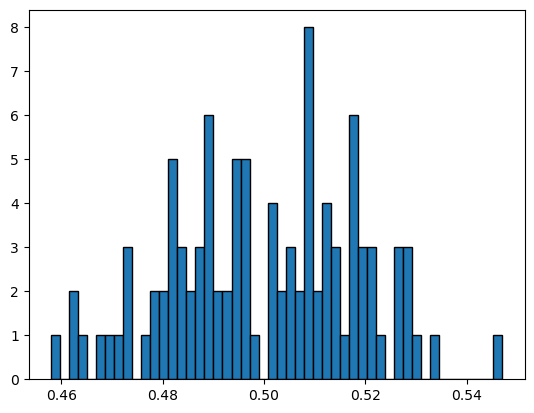

In [17]:
# plot a histogram of the sampling distribution

plt.hist(sampling_dist, bins = 50, edgecolor = "black");



### 1c. Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can use our `flip_coins(n, prob_heads, return_prop)` function we wrote in the warm-up exercises above. 
 


In [18]:
%%time

# sampling distribution of many polls conducted
sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = flip_coins(sample_size,  true_prop_Biden, return_prop = True)
    sampling_dist.append(prop_biden)



CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.68 ms


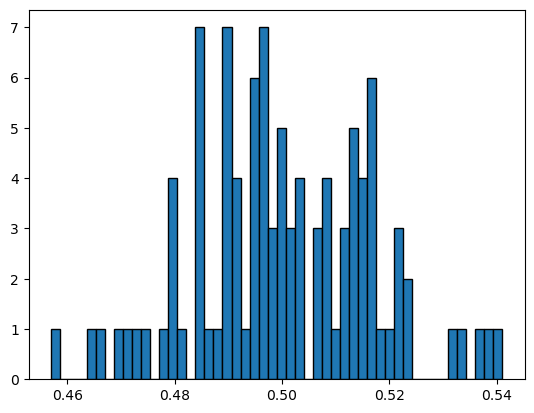

In [19]:
plt.hist(sampling_dist, bins = 50, edgecolor = "black");




## 2. Hypothesis tests

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution of statistics, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the null and alternative hypothesis
2. Calculate the observed statistic of interest
3. Create the null distribution 
4. Calculate the p-value 
5. Make a decision

Let's run through these steps now!


#### Step 1: State the null and alternative hypothesis


$ H_0: \pi = 0.50 $


$ H_A: \pi < 0.50 $




#### Step 2: Calculate the observed statistic of interest


In [20]:
# load the data

movies = pd.read_csv("movies.csv")

movies.head(3)

year       imdb             title             test clean_test binary  \
0  2013  tt1711425     21 &amp; Over           notalk     notalk   FAIL   
1  2012  tt1343727          Dredd 3D      ok-disagree         ok   PASS   
2  2013  tt2024544  12 Years a Slave  notalk-disagree     notalk   FAIL   

     budget    domgross     intgross      code  ...       director  \
0  13000000  25682380.0   42195766.0  2013FAIL  ...            NaN   
1  45000000  13414714.0   40868994.0  2012PASS  ...            NaN   
2  20000000  53107035.0  158607035.0  2013FAIL  ...  Steve McQueen   

      released                                             actors  \
0          NaN                                                NaN   
1          NaN                                                NaN   
2  08 Nov 2013  Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...   

                       genre  \
0                        NaN   
1                        NaN   
2  Biography, Drama, History   

                                              awards  runtime   type  \
0                                                NaN      NaN    NaN   
1                                                NaN      NaN    NaN   
2  Won 3 Oscars. Another 131 wins & 137 nominations.  134 min  movie   

                                              poster imdb_votes error  
0                                                NaN        NaN   NaN  
1                                                NaN        NaN   NaN  
2  http://ia.media-imdb.com/images/M/MV5BMjExMTEz...    143,446   NaN  

[3 rows x 34 columns]

In [22]:
# reduce data to a smaller number of columns: "title" and "binary"

movies_small = movies[["title", "binary"]]
movies_small.head(3)


title binary
0     21 &amp; Over   FAIL
1          Dredd 3D   PASS
2  12 Years a Slave   FAIL

Which statistic is most helpful in resolving the above Hypothesis?

Answer: Sample Proportion, that is $ \hat{p} $.

What is the sample size?

Answer: `smaller_df.shape[0]`

Let us compute the observed statistic $ \hat{p}$ below:

In [24]:
# calculate the proportion of movies that pass the Bechdel test

bool_pass = movies_small["binary"] == "PASS"
obs_stat = np.mean(bool_pass)
obs_stat


np.float64(0.447603121516165)

#### Step 3: Create the null distribution 

We need to create a null distribution, which is the distribution of statistics we would expect to get if the null hypothesis is true. 



**Question**: If the null hypothesis is true and if you were to obtain a sample of size `smaller_df.shape[0]` from the population, about what percent of the movies would we expect to pass the Bechdel test?

**Answer**: $ 50 \% $

Let's create simulated data that is consistent with this!


In [37]:
# Let's generate one proportion consistent with the null hypothesis

# get the total number of movies in our dataset n
n = movies_small.shape[0]
print(n)

# proportion consistent with the null hypothesis
null_prop = 0.50


# one statistic consistent with null hypothesis
flip_coins(n, null_prop, return_prop = True)



1794


np.float64(0.49888517279821626)

In [38]:
# Let's generate a null distribution 

null_dist = []

for i in range(10_000):
    null_dist.append(flip_coins(n, null_prop, return_prop = True))
    




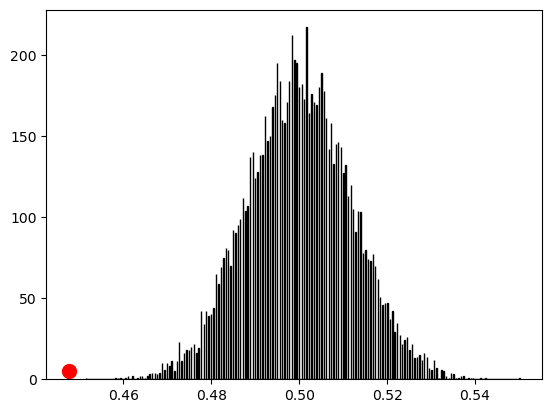

In [39]:
# visualize the null distribution 

plt.hist(null_dist, bins = 1000, edgecolor = "black");
plt.plot(obs_stat, 5, '.', markersize = 20, color = "red");



#### Step 4: Calculate the p-value 

Calculate the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [41]:
# Calculate the p-value

# create a Boolean vector indicating whether each p-hat in the null distribution 
# was greater than the observed proportion that passed the Bechdel test




# calculate the p-value 
p_value = np.mean(null_dist <= obs_stat)
p_value



np.float64(0.0)

#### Step 5: Make a decision

Since the p-value is very small (essentially zero), it is very unlikely that our statistic come from the null distribution. Thus we will reject the null hypothesis and conclude that less than $ 50 \%$ of movies pass the Bechdel test.


<br>
<br>
<br>
<br>
<br>
<br>

## 3. Hypothesis test assessing causal relationships

To get at causality we can run a Randomized Controlled Trial (RTC), where have of the participants are randomly assigned to a "treatment group" that receives an intervention and the other half of participants are put in a "control group" which receives a placebo. If the treatment group shows a an improvement over the control group that is larger than what is expected by chance, this indicates that the treatment **causes** an improvement. 


#### Botulinum Toxin A (BTA) as a treatment to chronic back pain

A study by Foster et al (2001) examined whether Botulinum Toxin A (BTA) was an effective treatment for chronic back pain.

In the study, participants were randomly assigned to be in a treatment or control group: 
- 15 in the treatment group
- 16 in the control group (normal saline)

Trials were run double-blind (neither doctors nor patients knew which group they were in)

Result from the study were coded as:
  - 1 indicates pain relief
  - 0 indicates lack of pain relief 


Let's run a hypothesis test to see if BTA causes a decrease in back pain.

### Step 1: State the null and alternative hypotheses

$ H_0: \pi_{treat} = \pi_{control} \enspace $ or $ \enspace \pi_{treat} - \pi_{control} = 0 $

$ H_A: \pi_{treat} > \pi_{control} \enspace $ or $ \enspace \pi_{treat} - \pi_{control} > 0 $





### Step 2: Calculate the observed statistic

The code below loads the data from the study. We can use the difference in proportions  $\hat{p}_{treat} - \hat{p}_{control}$  as our observed statistic. 

Let's calculate the observe statistic and save it to the name `obs_stat`.


In [44]:
bta = pd.read_csv('bta.csv')
bta.sample(frac = 1).head()

Group  Result
20  Treatment     1.0
1     Control     1.0
11    Control     0.0
2     Control     0.0
18  Treatment     1.0

In [46]:
# create a DataFrame with the proportion of people in the treatment and control groups that have pain relief 

group_means = bta.groupby("Group").mean()
group_means


Result
Group            
Control     0.125
Treatment   0.600

In [51]:
# calculate the difference
diff = group_means.loc["Treatment"] - group_means.loc["Control"]
type(diff)
# extract the value from a series to 
obs_stat = diff.iloc[0]
obs_stat

np.float64(0.475)

In [53]:
# let's write a function to make it easy to get statistic values

def get_prop_diff(bta_data):
    group_means = bta_data.groupby("Group").mean()
    diff = group_means.loc["Treatment"] - group_means.loc["Control"]
    return diff.iloc[0]


get_prop_diff(bta)




np.float64(0.475)

### Step 3: Create the null distribution 

To create the null distribution, we need to create statistics consistent with the null hypothesis. 

In this example, if the null hypothesis was true, then there would be no difference between the treatment and control group. Thus, under the null hypothesis, we can shuffle the group labels and get equally valid statistics. 

Let's create one statistic consistent with the null distribution to understand the process. We can then repeat this 10,000 times to get a full null distribution. 

In [61]:
# shuffle the data 

bta_shuff = bta.copy()
bta_shuff["Group"] = np.random.permutation(bta_shuff["Group"])
bta_shuff.head()



Group  Result
0  Treatment     1.0
1    Control     1.0
2  Treatment     0.0
3    Control     0.0
4    Control     0.0

In [62]:
# get one statistic consistent with the null distribution 

get_prop_diff(bta_shuff)




np.float64(0.08750000000000002)

In [72]:
%%time

# create a full null distribution 

null_dist = []

for i in range(10_000):
    bta_shuff["Group"] = np.random.permutation(bta_shuff["Group"])
    null_dist.append(get_prop_diff(bta_shuff))





CPU times: user 8.03 s, sys: 2.9 ms, total: 8.03 s
Wall time: 8.11 s


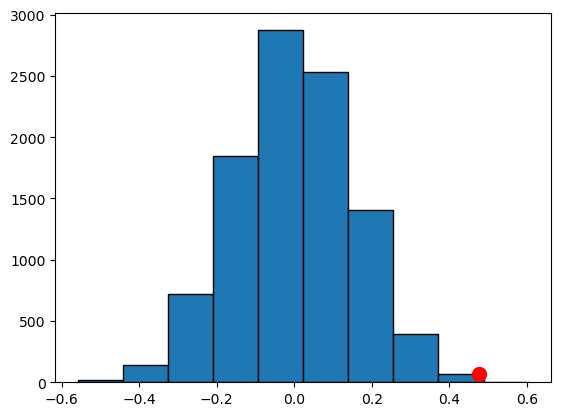

In [73]:
# visualize the null distribution 

plt.hist(null_dist, bins = 10, edgecolor = "black");
plt.plot(obs_stat, 70, '.', markersize = 20, color = "red");

# put a line at the observed statistic value





### Step 4: Calculate the p-value

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [75]:

p_value = np.mean(null_dist >= obs_stat)
p_value


np.float64(0.0073)

### Step 5: Draw a conclusion


Since the p-value is less than the typical significance level of $ 0.05 $, we can reject the null hypothesis. Because the participants were randomly assigned to the treatment and control groups, we conclude that BTA does cause pain relief at a higher rate than the placebo.



<br>
<center>
<img src="https://image.spreadshirtmedia.com/image-server/v1/compositions/T347A2PA4306PT17X24Y42D1035176833W20392H24471/views/1,width=550,height=550,appearanceId=2,backgroundColor=000000,noPt=true/ok-but-first-botox-fillers-botox-funny-botox-womens-t-shirt.jpg" alt="botox" style="width: 200px;"/>
</center>
<br>

## 4. Hypothesis test for two means: Smoking and baby weights

The Child Health and Development Studies investigate a range of topics. One study, in particular, considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area.

Let's examine this data to see if the average weight of babies of babies is different depending on whether the mother of the baby smokes. 


### Step 1: State the null and alternative hypotheses

$ H_0: \mu_{non-smoke} = \mu_{smoke} \enspace $ or $ \enspace \mu_{non-smoke} - \mu_{smoke} = 0$

$ H_A: \mu_{non-smoke} > \mu_{smoke} \enspace $ or $ \enspace \mu_{non-smoke} - \mu_{smoke} > 0$



### Step 2: Calculate the observed statistic

The code below loads the data from the study. The two relevant columns are:
- `bwt`: The birth weight of the baby in ounces
- `smokes`: whether the mother smokes (1) or does not smoke (0)

More information about the data is available at: https://www.openintro.org/data/index.php?data=babies

In [76]:
babies = pd.read_csv("babies.csv")

babies.head()

case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0

To simplify the analysis, create a new DataFrame called `babies2` that only has the smoke and bwt columns. 

In [77]:
# create a DataFrame called babies2 that has only the smoke and bwt columns

babies_small = babies[["bwt", "smoke"]]
babies_small.head()


bwt  smoke
0  120    0.0
1  113    0.0
2  128    1.0
3  123    0.0
4  108    1.0

Let's have our observed statistic be the different of sample means  $\bar{x}_{non-smoke} - \bar{x}_{smoke}$.  

Please calculate this observe statistic and save it to the name `obs_stat`.


In [79]:

group_means2 = babies_small.groupby("smoke").mean()
group_means2

bwt
smoke            
0.0    123.047170
1.0    114.109504

In [85]:

diff2 = group_means2.loc[0.0] - group_means2.loc[1.0]
type(diff2)

obs_stat = diff2.iloc[0]
obs_stat

np.float64(8.93766567908935)

To make the rest of the analysis easier, write a function `get_diff_baby_weights(babies_df)` that will take a DataFrame `babies_df` that has smoke and btw information will return the difference in the means of babies that have mothers who to not smoke and those who do smoke. 

Also, test the function to make sure it give the same observed statistic you calculated above

In [87]:
def get_diff_baby_weights(babies_df):
    group_means2 = babies_df.groupby("smoke").mean()
    diff2 = group_means2.loc[0.0] - group_means2.loc[1.0]
    return diff2.iloc[0]
    




# get that the function works

get_diff_baby_weights(babies_small)



np.float64(8.93766567908935)

### Step 3: Create the null distribution 

Now let's create a null distribution that has 10,000 statistics that are consistent with the null hypothesis. 

In this example, if the null hypothesis was true, then there would be no difference between the smoking mothers and the non-smoking mothers. Thus, under the null hypothesis, we can shuffle the group labels and get equally valid statistics. 

Let's create one statistic consistent with the null distribution to understand the process. We can then repeat this 10,000 times to get a full null distribution. 

In [93]:
# shuffle the data 

babies_shuff = babies_small.copy()
babies_shuff["smoke"] = np.random.permutation(babies_shuff["smoke"])



In [94]:
%%time

# create a full null distribution 

null_dist = []

for i in range(10_000):
    babies_shuff["smoke"] = np.random.permutation(babies_shuff["smoke"])
    null_dist.append(get_diff_baby_weights(babies_shuff))
    








CPU times: user 8.29 s, sys: 902 μs, total: 8.29 s
Wall time: 8.36 s


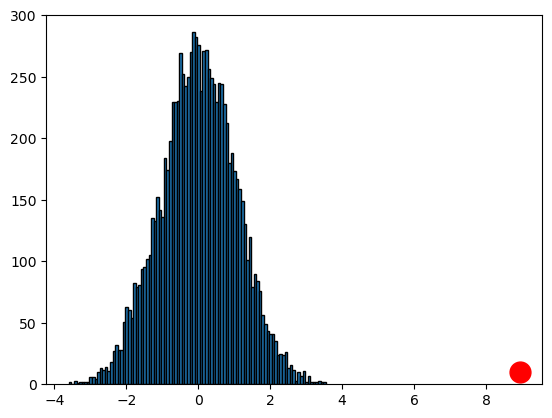

In [96]:
# visualize the null distribution 

plt.hist(null_dist, bins = 100, edgecolor = "black");
plt.plot(obs_stat, 10, '.', markersize = 30, color = "red");

# put a line at the observed statistic value





### Step 4: Calculate the p-value

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [98]:

p_value = np.mean(null_dist >= obs_stat)
p_value


np.float64(0.0)

### Step 5: Draw a conclusion

Since the p-value is less than the typical significance level of $0.05$, we can reject the null hypothesis. Hence we conclude there is a difference between in the average weight of babies born to mothers who smoke compared to mothers who do not smoke.

However, because this was an observational study, where mothers were not randomly assigned to treatment and control groups, we can not conclude that smoking does causes babies to have less weight when they are born. In particular, it is possible there could be other **"lurking/confounding"** variables that cause both the mothers to smoke, and the babies to have less weight.








<br>
<center>
<img src="https://i.ytimg.com/vi/x4c_wI6kQyE/maxresdefault.jpg" alt="smoking" style="width: 300px;"/>
</center>
<br>

## 5. Hypothesis tests for correlation

Let's run a hypothesis tests for correlation to see if books that have more pages cost more! 


### Step 1: State the null and alternative hypotheses

**In words** 

Null hypthesis: There is no correlation between the number of pages in a book and the cost of the book.

Alternative hypothesis: Books that have more pages cost more.




**In symbols**

$ \rho = 0$

$ \rho > 0$





### Step 2: Calculate the observed statistic

Data on 230 books from Amazon.com are loaded below. Let's calculate the observed correlation ($r$) between the number of pages in the book (`NumPages`) and the listed price (`List.Price`). 

To make your life easier, first just reduce the data set to only the `NumPages` and `List.Price` columns and save this to a DataFrame called `amazon_smaller`. Then use `amazon_smaller` for the rest of this problem


In [99]:
amazon = pd.read_csv("amazon.csv")

amazon.head(3)

Title       Author  List.Price  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...  Cary McNeal       12.95   
1  21: Bringing Down the House - Movie Tie-In: Th...  Ben Mezrich       15.00   
2       100 Best-Loved Poems (Dover Thrift Editions)        Smith        1.50   

   Amazon.Price Hard..Paper  NumPages           Publisher  Pub.year  \
0          5.18           P       304         Adams Media    2010.0   
1         10.20           P       273          Free Press    2008.0   
2          1.50           P        96  Dover Publications    1995.0   

      ISBN.10  Height  Width  Thick  Weight..oz.  
0  1605506249     7.8    5.5    0.8         11.2  
1  1416564195     8.4    5.5    0.7          7.2  
2   486285537     8.3    5.2    0.3          4.0

In [101]:
import statistics

amazon_smaller = amazon[["NumPages", "List.Price"]]

obs_stat = statistics.correlation(amazon_smaller.NumPages, amazon_smaller["List.Price"])

obs_stat




0.21455197256312525

### Step 3: Create the null distribution 

How can we create one statistic consistent with the null hypothesis? 

See if you can create one statistic consistent with the null distribution below. Once you have done that, create the full null distribution!



In [102]:
# Create one statistic consistent with the null distribution

statistics.correlation(amazon_smaller.NumPages, np.random.permutation(amazon_smaller["List.Price"]))


np.float64(-0.03781198509930373)

In [103]:
%%time

# Create the full null distribution

null_dist = []

for i in range(10000):  
        
    shuff_stat = statistics.correlation(amazon_smaller.NumPages, 
                                        np.random.permutation(amazon_smaller["List.Price"]))
    
    null_dist.append(shuff_stat)






CPU times: user 1.66 s, sys: 0 ns, total: 1.66 s
Wall time: 1.67 s


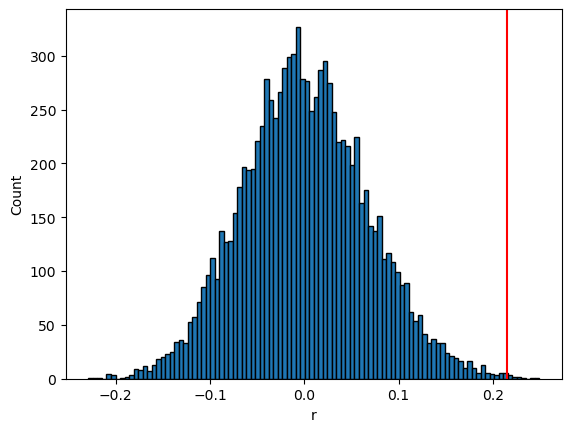

In [105]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 100);

# put a line at the observed statistic value

plt.axvline(obs_stat, color = "red");
plt.xlabel("r");
plt.ylabel("Count");



### Step 4: Calculate the p-value


In [106]:
p_value = np.mean(np.array(null_dist) >= obs_stat)

p_value



np.float64(0.0014)

### Step 5: Draw a conclusion

The p-value is small (less than the convensional level of $0.05$), so we would reject the null hypothesis and conclude that there is a correlation between the number of pages in a book and the price of a book at the population level.




## 6. Visualizing hypothesis tests for correlation

We can also run a visual hypothesis test for correlation by creating a visual lineup that displays several scatter plots of shuffled data and one scatter plot of the real data. If you can tell which plot contains the real (unshuffled) data, this corresponds to being able to reject the null hypothesis. 


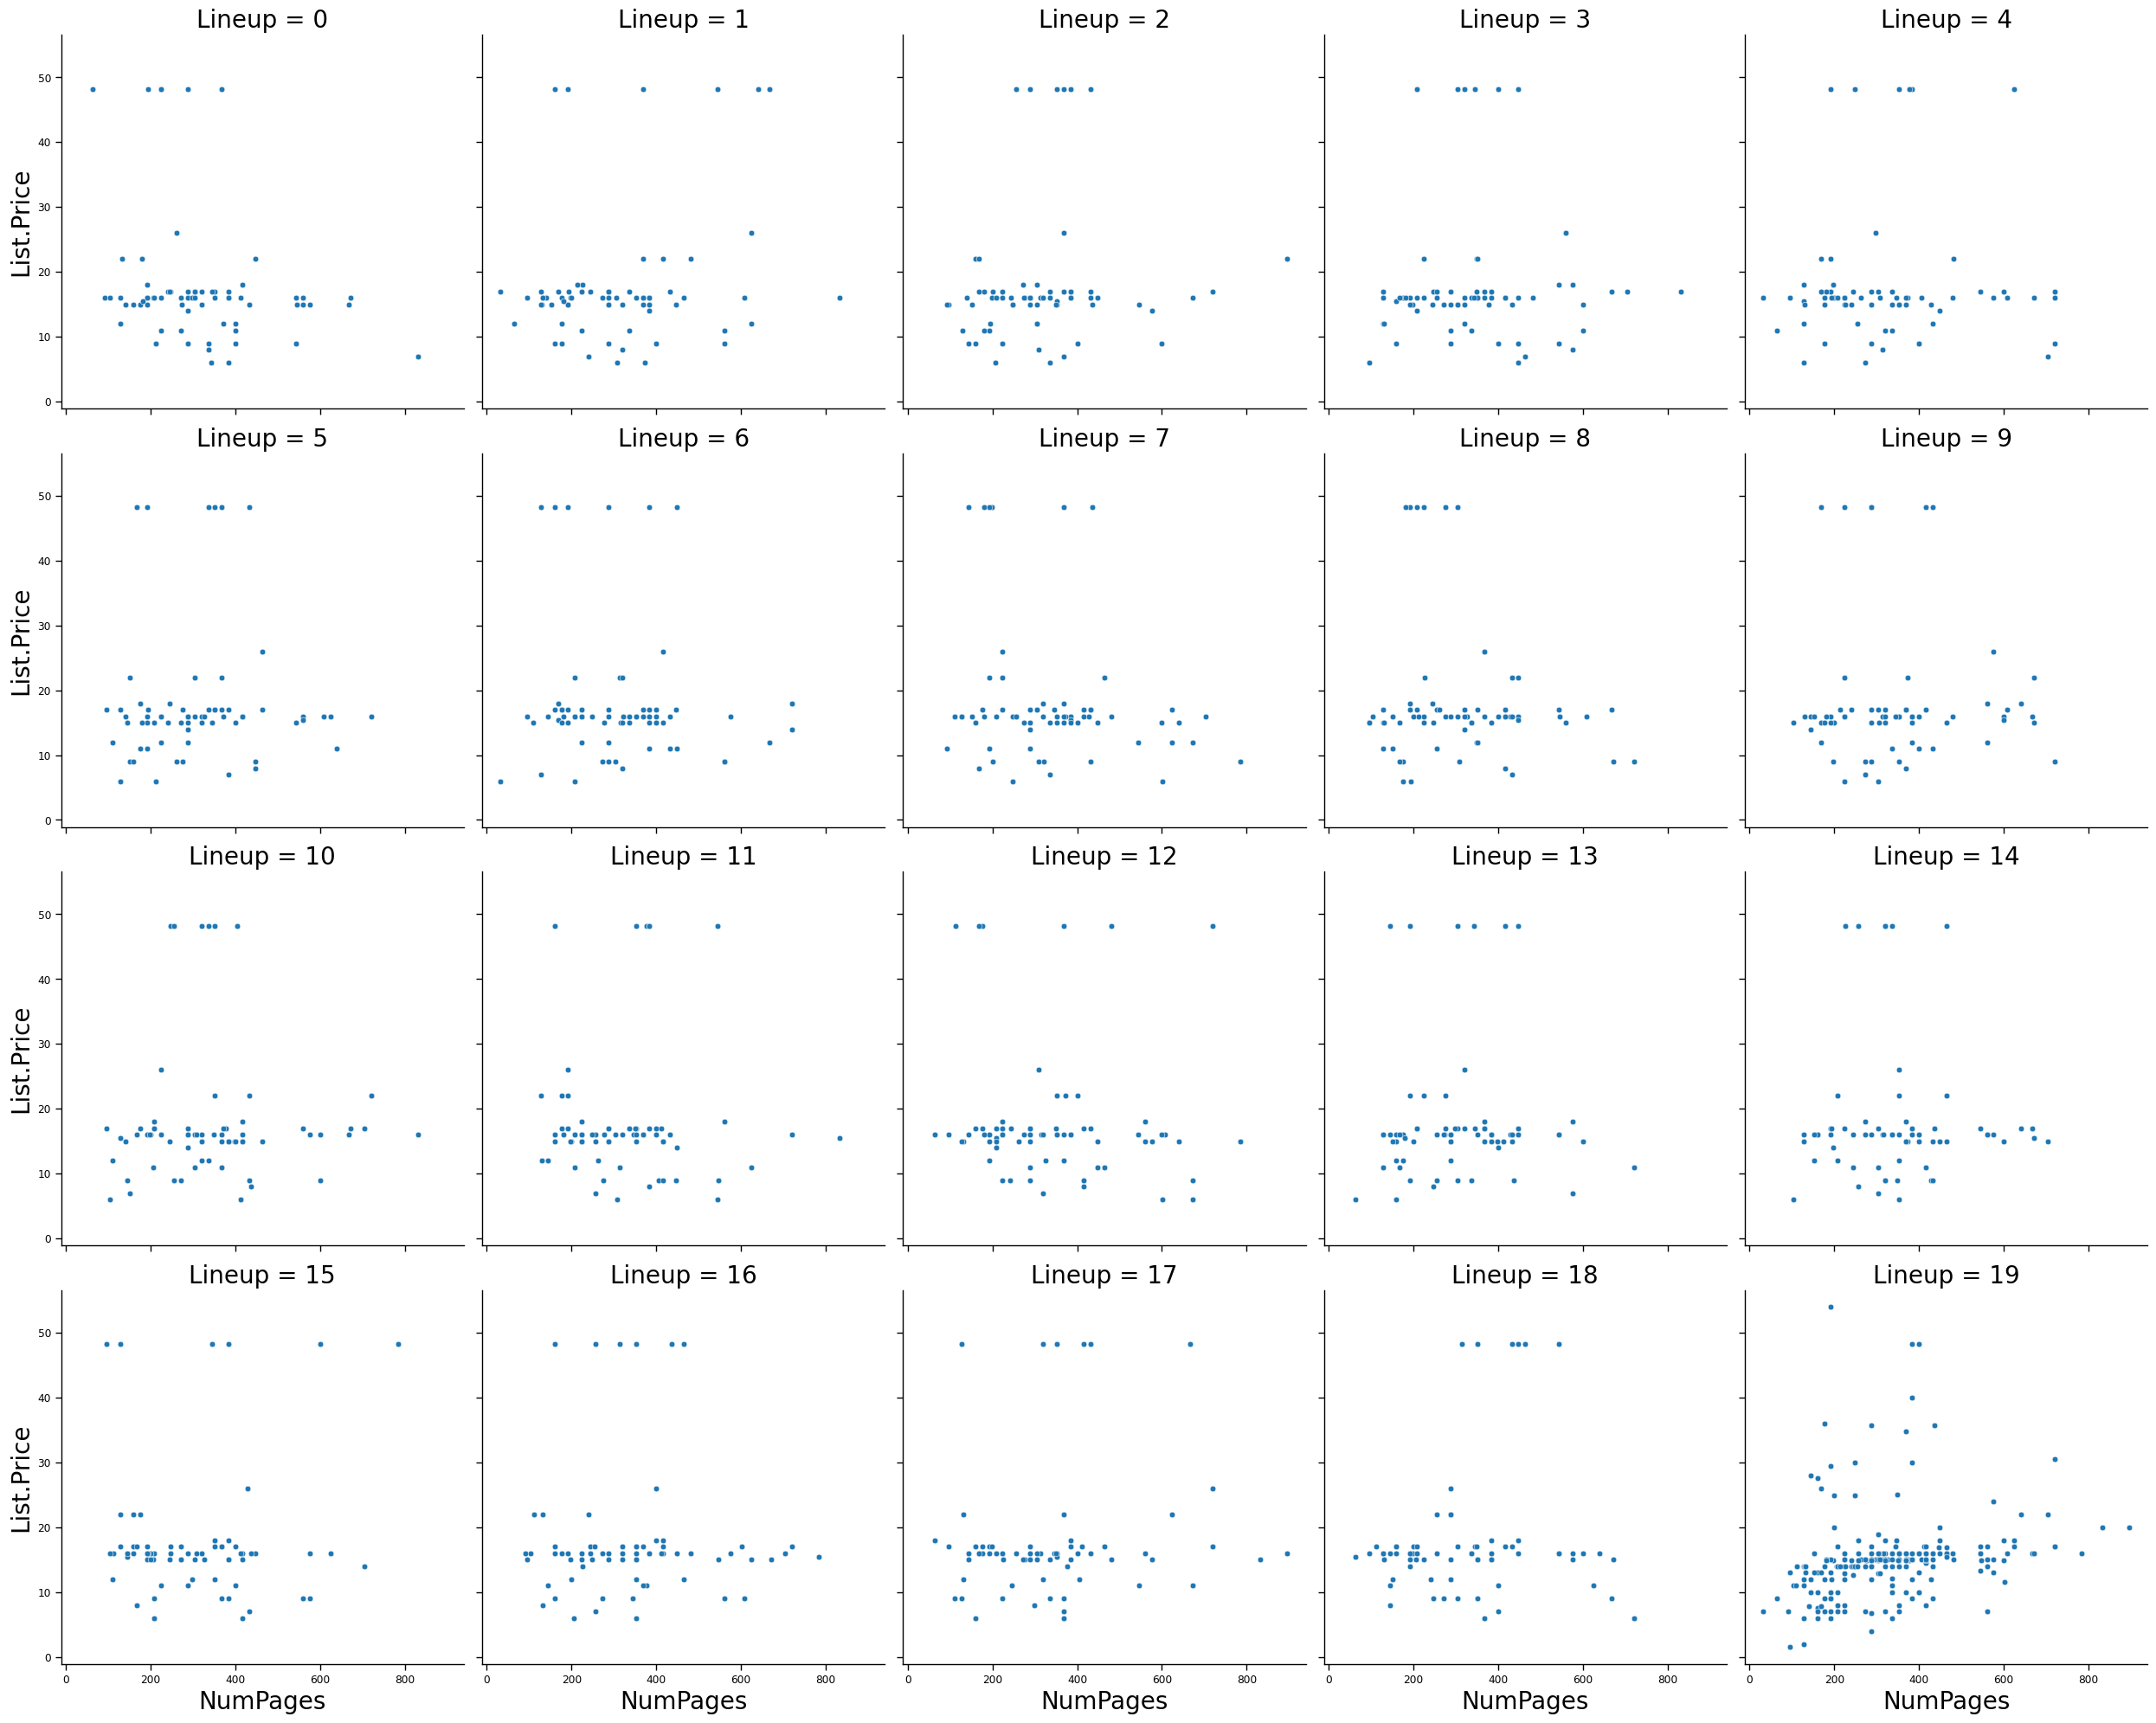

In [107]:
def create_lineup(the_data): 
    
    real_plot_num = np.random.permutation(range(20))[0]
    lineup_data = pd.DataFrame()
    
    for i in range(20):
        
        if i == real_plot_num:
            curr_data = the_data.copy()
        
        else:
            curr_data = pd.DataFrame(the_data.iloc[:, 1], the_data.iloc[:, 0]).reset_index()
            curr_data[curr_data.columns[1]] = np.random.permutation(curr_data[curr_data.columns[1]])
        
        curr_data.loc[:, "Lineup"] = i
        lineup_data = pd.concat([lineup_data, curr_data])
        
    lineup_data = lineup_data.reset_index()

    sns.set_context("paper", rc={"axes.labelsize":20})   
    sns.relplot(lineup_data, x = lineup_data.columns[1], y = lineup_data.columns[2], col = "Lineup", col_wrap=5); 

    return real_plot_num


the_answer = create_lineup(amazon_smaller)

In [108]:
# display the answer

the_answer


np.int64(19)